In [1]:
import numpy as np
import torch
import torch.nn as nn
import random
import gym

In [2]:
class Qnetwork(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features=n_input, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=n_output))

    def forward(self, x):
        return self.net(x)


    def select_action(self, obs, temperature=1.0):
        q_values = self.online_net(torch.tensor(state, dtype=torch.float32))
        action_probs = F.softmax(q_values / temperature, dim=-1)
        action = torch.multinomial(action_probs, 1).item()
        return action

    def act(self, obs, epsilon):
        obs_tensor = torch.as_tensor(obs, dtype=torch.float32)
        q_values = self(obs_tensor.unsqueeze(0))
        if random.random() < epsilon:
            return random.randrange(len(q_values[0]))
        else:
            return torch.argmax(q_values).item()

In [3]:
##Agent without Experience Replay or Target Network
class Agent:
    def __init__(self, n_input, n_output, gamma=0.97, learning_rate=0.01):
        self.online_net = Qnetwork(n_input, n_output)
        self.target_net = Qnetwork(n_input, n_output)
        self.optimizer = torch.optim.Adam(self.online_net.parameters(), lr=learning_rate)
        self.gamma = gamma

    def train_step(self, state, action, reward, next_state, done):
        q_values = self.online_net(torch.tensor(state, dtype=torch.float32))
        q_value = q_values[action]

        if done:
            target = reward
        else:
            with torch.no_grad():
                next_q_values = self.target_net(torch.tensor(next_state, dtype=torch.float32))
                target = reward + self.gamma * torch.max(next_q_values).item()

        loss = nn.functional.smooth_l1_loss(torch.tensor([target]), q_value)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

In [7]:
def run(agent, n_episode, temp):

  episode_array = []
  total_reward_array = []
  #Training loop
  for episode in range(n_episode):
    state = env.reset()
    #epsilon = max(epsilon_end, epsilon_start - episode / epsilon_decay)
    total_reward = 0

    for step in range(200):  # Maximum of 200 steps per episode
        action = agent.online_net.act(state, temp)

        next_state, reward, done, _ = env.step(action)
        agent.train_step(state, action, reward, next_state, done)

        state = next_state
        total_reward += reward

        if done:
          episode_array.append(episode)
          total_reward_array.append(total_reward)
          total_reward = 0
          break

    print(f"Episode {episode + 1}: Total Reward = {total_reward_array[episode]}")

  return episode_array, total_reward_array

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:

# Parameters
env_name = "CartPole-v1"
env = gym.make(env_name)
num_state = env.observation_space.shape[0]
num_action = env.action_space.n
n_episode = 1000
temp = 1.0
gamma = 0.97
TARGET_UPDATE = 10

# Initialize agent for temp = 1.0
agent = Agent(num_state, num_action, gamma=gamma)

e_array, r_array = run(agent, n_episode, temp)

env.close()


temp = 0.9

# Initialize agent for temp = 0.9
agent = Agent(num_state, num_action, gamma=gamma)

e1_array, r1_array = run(agent, n_episode, temp)

env.close()


temp = 0.5

# Initialize agent for epsilon = 0.5
agent = Agent(num_state, num_action, gamma=gamma)

e2_array, r2_array = run(agent, n_episode, temp)

env.close()



/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
<ipython-input-3-97482928c8a3>:20: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect 

Episode 1: Total Reward = 42.0
Episode 2: Total Reward = 33.0
Episode 3: Total Reward = 21.0
Episode 4: Total Reward = 23.0
Episode 5: Total Reward = 10.0
Episode 6: Total Reward = 31.0
Episode 7: Total Reward = 12.0
Episode 8: Total Reward = 23.0
Episode 9: Total Reward = 23.0
Episode 10: Total Reward = 20.0
Episode 11: Total Reward = 46.0
Episode 12: Total Reward = 9.0
Episode 13: Total Reward = 33.0
Episode 14: Total Reward = 17.0
Episode 15: Total Reward = 17.0
Episode 16: Total Reward = 34.0
Episode 17: Total Reward = 10.0
Episode 18: Total Reward = 18.0
Episode 19: Total Reward = 16.0
Episode 20: Total Reward = 16.0
Episode 21: Total Reward = 14.0
Episode 22: Total Reward = 38.0
Episode 23: Total Reward = 29.0
Episode 24: Total Reward = 48.0
Episode 25: Total Reward = 14.0
Episode 26: Total Reward = 14.0
Episode 27: Total Reward = 30.0
Episode 28: Total Reward = 10.0
Episode 29: Total Reward = 17.0
Episode 30: Total Reward = 13.0
Episode 31: Total Reward = 21.0
Episode 32: Total 

In [9]:
#print(total_reward_array)

r_array = r_array[::10]
e_array = e_array[::10]
x = e_array #print(e1_array)
y = r_array
print(x)
print(y)

r1_array = r1_array[::10]
e1_array = e1_array[::10]
x1 = e1_array #print(e1_array)
print(x1)
y1 = r1_array
print(y1)

r2_array = r2_array[::10]
e2_array = e2_array[::10]
x2 = e2_array #print(e1_array)
y2 = r2_array

#print(x)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]
[42.0, 46.0, 14.0, 21.0, 32.0, 19.0, 41.0, 39.0, 19.0, 18.0, 14.0, 16.0, 11.0, 18.0, 14.0, 12.0, 17.0, 13.0, 17.0, 25.0, 29.0, 14.0, 33.0, 52.0, 11.0, 31.0, 15.0, 48.0, 19.0, 17.0, 19.0, 23.0, 20.0, 15.0, 17.0, 22.0, 9.0, 14.0, 66.0, 20.0, 13.0, 13.0, 13.0, 20.0, 67.0, 33.0, 31.0, 20.0, 11.0, 17.0, 34.0, 46.0, 15.0, 26.0, 15.0, 42.0, 23.0, 14.0, 16.0, 14.0, 9.0, 22.0, 19.0, 23.0, 15.0, 27.0, 17.0, 42.0, 37.0, 14.0, 39.0, 15.0, 10.0, 14.0, 27.0, 26.0, 13.0, 29.0, 15.0, 33.0, 24.0, 29.0, 31.0, 14.0, 31.0, 1

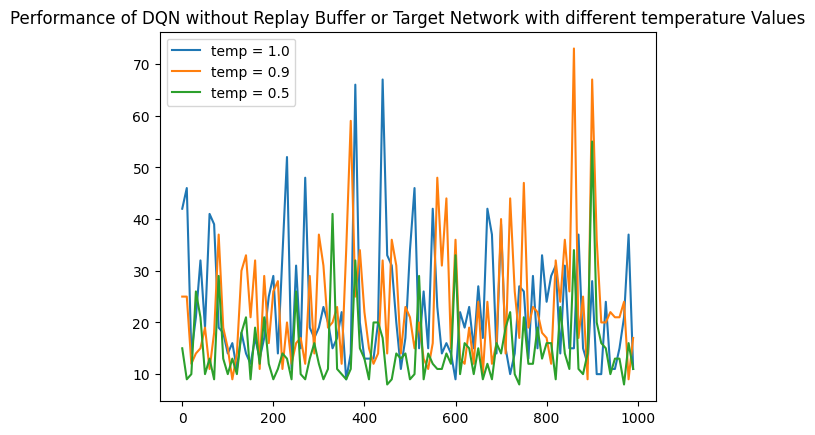

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("Performance of DQN without Replay Buffer or Target Network with different temperature Values")
plt.plot(x, y, label = "temp = 1.0")
plt.plot(x1, y1, label = "temp = 0.9")
plt.plot(x2, y2, label = "temp = 0.5")
plt.legend()
plt.show()
